In this project, we will generate a few kinds of object structures:

- Triangle: Right triangle that has shorter edges parallel to axis

   ``
O
OOO
OOOOO
   ``
- Rectangle: Small rectangle

- L shape

   ``
O
O
OOOOO
   ``

In [9]:
from random import random
from random import randint
from random import choice
from numpy import array
from numpy import zeros
import numpy as np

In [61]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot

In [1]:
def check_in_frame ( size, pos ):
    """
    Allow space around the shape
    """
    if 0 <= pos[0] < size and  0 <= pos[1] < size:
        return True
    return False

def check_in_frame_with_space ( size, pos ):
    """
    Allow space around the shape
    """
    if 1 <= pos[0] < size - 1 and  1 <= pos[1] < size - 1:
        return True
    return False

In [14]:
def generate_rectangle(frame , width, height, position, color):
    """
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame_with_space ( size, position ) or not check_in_frame_with_space ( size, other_corner ):
        return False
    
    frame[ position[0] : position[0] + height, 
          position[1] : position[1] + width] = np.ones((height, width)) * color
    
    return True

#### Test

In [42]:
f = zeros ((10, 10))

generate_rectangle(f, 4, 2, (2,2), 2)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  2.  2.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
def generate_triangle(frame, side, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with side = 4, direction = 0
    
    S
    o o 
    o o o
    o o o o
    
    direction = 1
    
    S o o o
    o o o 
    o o
    o 
    
    direction = 2
    
    S o o o
      o o o 
        o o
          o 
    
    direction = 3
    
    S     o
        o o 
      o o o
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    side: length of the shorter side of triangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + side - 1, position[1] + side - 1 )
    
    if not check_in_frame_with_space ( size, position) or not check_in_frame_with_space ( size, other_corner ):
        return False
    
    inner_shape = np.tril(np.ones((side, side)) * color)
    
    # Generate for direction == 0, and rotate it to the correct direction
    rotated_shape = np.rot90 ( inner_shape, -direction )
    
    
    frame[ position[0] : position[0] + rotated_shape.shape[0], 
          position[1] : position[1] + rotated_shape.shape[1] ] = rotated_shape
    
    return True

#### Test

In [43]:
f = zeros ((10, 10))

generate_triangle(f, 4, 3, (2,2), 1)

print (f)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [44]:
def generate_l_shape(frame, width, height, direction, position, color):
    """
    Impose an triangle shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is a triangle with width = 4, height = 3, direction = 0
    
    S
    o 
    o o o o
    
    direction = 1
    
    S o o o
    o 
    o
    
    direction = 2
    
    S o o o
          o 
          o
    
    direction = 3
    
    S     o
          o 
    o o o o
    
    Parameters:
    =====================
    frame: squared frame
    width: width of rectangle
    height: height of rectangle
    direction: 
    position: tuple of 2
    color: (color the cells with this value)
    
    Returns:
    =====================
    - success: whether imposition successes or not
    
    """
    size = frame.shape[0]
    other_corner = ( position[0] + height - 1, position[1] + width - 1 )
    
    if not check_in_frame_with_space ( size, position) or not check_in_frame_with_space ( size, other_corner ):
        return False
    
    if direction == 0 or direction == 3:
        frame[ position[0] + height - 1,  position[1] : position[1] + width ] = color
    
    if direction == 1 or direction == 2:
        frame[ position[0]             ,  position[1] : position[1] + width ] = color
        
    if direction == 0 or direction == 1:
        frame[ position[0]: position[0] + height,  position[1] ] = color
        
    if direction == 2 or direction == 3:
        frame[ position[0]: position[0] + height,  position[1] + width - 1 ] = color
    
    return True

#### Test

In [92]:
f = zeros ((10, 10))

generate_l_shape(f, 4, 3, 0, (2,2), 0.1)

print (f)

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.1  0.1  0.1  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


In [96]:
generate_l_shape(f, 4, 3, 0, (4,4), 0.5)

print (f)

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.1  0.1  0.5  0.1  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.5  0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


### Create a color codes

In [97]:
codes = ['white', 'green', 'blue', 'yellow', 'purple', 'red']
cm = mpl.colors.ListedColormap(codes)

In [98]:
# Plot function with colors
def plot( frame , l = None):
    # create a gray scale subplot for each frame
    pyplot.imshow(frame, cmap=cm )
    # turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # show the plot
    pyplot.show()

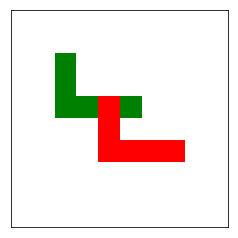

In [99]:
plot(f)

Notice that pixel values in the image would be mapped to range (0, 1) before mapping to the real color values

In [ ]:
def generate ( frame,  ):
    pass